In [64]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, assemble, extensions
from qiskit.visualization import *

from os import environ

#local environment variable to store the access token :)
token = environ.get('ibmq_token')

In [61]:
# Loading your IBM Q account(s)
account = IBMQ.save_account(token, overwrite=True)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-03-24 20:51:01,726: Credentials are already in use. The existing account in the session will be replaced.


In [62]:
# quasm_sim not necessary
simulator = Aer.get_backend('qasm_simulator')

In [26]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

# load the list of lists into a list :)
img_data = iris['images']
print(img_data[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


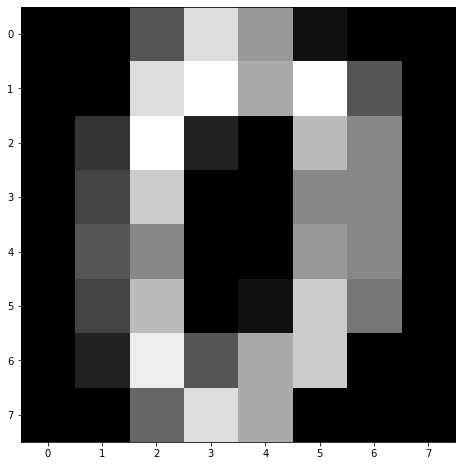

In [55]:

# setting the figure parameters to the size of the input
plt.rcParams['figure.figsize'] = [8, 8]

# testing one input
A = img_data[0]
B = img_data[5]

# displays image in grayscale
display = plt.imshow(A)
display.set_cmap('gray')


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

[[ 0.         -0.05959226  0.1752816   0.05540371  0.03729251 -0.3047647
   0.          0.        ]
 [ 0.         -0.05447486  0.00343946  0.48802791  0.09876213  0.07364842
  -0.04304886  0.        ]
 [ 0.          0.045151   -0.01199603  0.09404577  0.22089625  0.16346796
  -0.05366199 -0.        ]
 [-0.          0.09387843  0.16028185 -0.09264875 -0.01088966 -0.36768431
   0.01463615 -0.        ]
 [-0.          0.22231472 -0.11804625  0.01300128  0.3275643  -0.01511394
  -0.08811987  0.        ]
 [ 0.         -0.19217368  0.0032104   0.04038643  0.12449665  0.0107869
   0.44045065  0.        ]
 [ 0.         -0.         -0.          0.          0.         -0.
  -0.          0.00673247]
 [ 0.23511864 -0.    

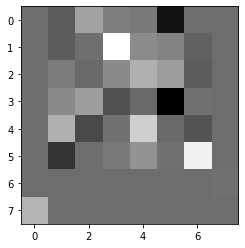

In [71]:
# perform full Singular Vector Decomposition (SVD)
U, S, VT = np.linalg.svd(A, full_matrices=False)

new_unitary = U*VT

print(A, new_unitary, sep='\n\n')


display = plt.imshow(new_unitary)
display.set_cmap('gray')


In [72]:
# circuit with 4 qubits, 4 cbits
qc = QuantumCircuit(1, 1)

# note: can use a loop here to encode multiple values
# next step is using bloch sphere rotations as ANN functions
extensions.UnitaryGate(new_unitary, 0)

# measure qubit's output
qc.measure(0, 0)

qc.draw()

ExtensionError: 'Input matrix is not unitary.'

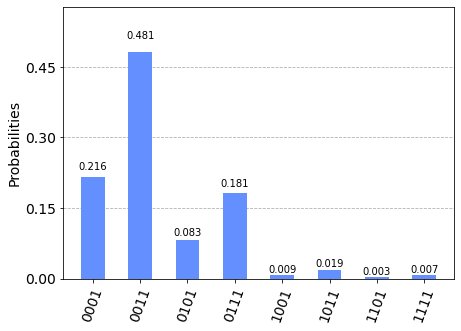

In [26]:
# run simulation 100000 times, stores results in counts
job = execute(qc, simulator, shots=100000)

results = job.result()

counts = results.get_counts(qc)

plot_histogram(counts)

In [35]:
# retrieving original data as the 
# expected value of each set of bits i.e
# add probabilities of all outputs with their 4th bit set on
bit4 = []
bit3 = []
bit2 = []
bit1 = []
# creating an array to access E(psi) more easily
for i in counts:
    prob = counts[i]/100000
    bit4.append([i[0], prob])
    bit3.append([i[1], prob])
    bit2.append([i[2], prob])
    bit1.append([i[3], prob])
    
# array of bit's arrays...
bits = [bit4, bit3, bit2, bit1]
q_data = []

# finding the expected value of each bit, appending to array
for nth_bit in bits:
    e_val = 0.0
    for bit in nth_bit:
#        print(bit[0], bit[1])
        if int(bit[0]) == 1:
            e_val += bit[1]
#            print('added')
    q_data.append(e_val)

orig = [round(i*max_val, 1) for i in q_data]
print(orig, '\nData Retrieved, just backwards')

[0.2, 1.4, 3.5, 5.1] 
Data Retrieved, just backwards
